# Predicting Areas of Affluence using Yelp Pricing Data

#### Authors: 
- Eddie Yip [LinkedIn](https://www.linkedin.com/in/eddie-yip-2a37324b/) | [Medium](https://medium.com/@eddie.yip2)
- Hadi Morrow [LinkedIn](https://www.linkedin.com/in/hadi-morrow-4b94164b/) | [GitHub](https://github.com/HadiMorrow) | [Medium](https://medium.com/@hadi.a.morrow)
- Mahdi Shadkam-Farrokhi: [GitHub](https://github.com/Shaddyjr) | [Medium](https://medium.com/@mahdis.pw) | [http://mahdis.pw](http://mahdis.pw)

## Problem Statement [Hadi]

While affluence should never be a factor when choosing to provide disaster aid or not, we must consider the following:

- On the assumption that affluence plays a role, one might relate affluency to preparedness. Those who can afford to will always look out for their families at any cost. Those who can not might not be able to prepare as well due to the fact that it is not an option. 

- On the assumption that affluence is not part of a majority class, if we should be miopic with our search efforts we might want to consider saving the masses, those living in tight coridors and those with little to no income. If effect those most suseptible to losing their lives in a major disaster. 

- Using tax data we aim to show that using YELP data dollar signs is enough to predict where we might want to quickly and accuratly align our efforts. 

New Light Technologies as our audience, we hope to show that while using expensive and hard to handle data such as tax data can be more precise, a quick and dirty aproach could be to simply sord though the dollar signs data on yelp. 

---
[Hadi] - Excellent write up! Here are some of my observations - feel free to include or not, totally up to you.
1. It would be nice for the reader if we define 'affluence' here at the start. What do we consider "affluent" in our data (I think we mentioned 15% of the area code?)?
2. As a reader, it would be VERY compelling to have an actual case where a natural disaster occured and the affluent areas weren't affected. If possible, research 1 or 2 cases when affluent areas were better prepared for natural disasters - this will help prove our predictive model has a real use case.
3. Tying into the use case, it might be helpful to mention a realistic disaster scenario when only having Yelp! price data would be useful. Like, there's an emergency and there's little time to pull granular information about the area, but knowing the yelp reviews for an area, allows first-responders to know which areas their efforts will have the most impact

## Executive Summary [Mahdi]

- Difficulty gathering data
- Prompt confusing regarding "affluence"
- Other projects used outside data as metric
- We pulled from API and didn't use old data, which was challenging

## Table of Contents
- [Gathering Data](#Gathering-Data)
- [Loading Data](#Loading-Data)
- [Preliminary Exploratory Data Analysis](#Preliminary-Exploratory-Data-Analysis)
- [Cleaning the Data](#Cleaning-the-Data)
- [Feature Engineering](#Feature-Engineering)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Model Preparation](#Model-Preparation)
- [Model Selection](#Model-Selection)
- [Model Evaluation](#Model-Evaluation)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Source Documentation](#Source-Documentation)

## Gathering Data
We got Yelp data using the API - link 
 
We got IRS data using - source [Eddie]

## Loading Data
- [All]
- For map visual, will need [Basemap](https://rabernat.github.io/research_computing/intro-to-basemap.html)

In [281]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import columnExpander
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression

In [302]:
data_file_path = "./data/total_merged_2.csv"
df_yelp = pd.read_csv(data_file_path, index_col = 0)
df_yelp.reset_index(drop=True, inplace = True) # same indeces were merged using multiple API calls

In [303]:
df_yelp.shape

(12865, 16)

## Preliminary Exploratory Data Analysis
- [All]

In [304]:
df_yelp.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,mos-original-brooklyn,"[{'alias': 'ramen', 'title': 'Ramen'}, {'alias...","{'latitude': 40.66127, 'longitude': -73.95342}",(718) 513-0698,1542.617156,YwpP-mgXV5N35xhLibLw5g,https://s3-media2.fl.yelpcdn.com/bphoto/-L9roT...,False,"{'address1': '453 Rogers Ave', 'address2': Non...",Mo's Original,1.718513e+10,NaN,4.5,32,[],https://www.yelp.com/biz/mos-original-brooklyn...
1,peaches-hothouse-brooklyn,"[{'alias': 'southern', 'title': 'Southern'}, {...","{'latitude': 40.6833699737169, 'longitude': -7...",(718) 483-9111,3471.525420,GA5msU6NO9rQRctPfDJCBg,https://s3-media1.fl.yelpcdn.com/bphoto/KEAXgZ...,False,"{'address1': '415 Tompkins Ave', 'address2': '...",Peaches HotHouse,1.718484e+10,$$,4.0,1082,"['pickup', 'delivery']",https://www.yelp.com/biz/peaches-hothouse-broo...
2,claw-daddys-brooklyn,"[{'alias': 'cajun', 'title': 'Cajun/Creole'}, ...","{'latitude': 40.68561, 'longitude': -73.98035}",(347) 318-8893,5062.337404,1x2hn3e9sCCZca1cnRTpEg,https://s3-media3.fl.yelpcdn.com/bphoto/ABHo2x...,False,"{'address1': '31 3rd Ave', 'address2': '', 'ad...",Claw Daddy's,1.347319e+10,$$,4.0,282,['restaurant_reservation'],https://www.yelp.com/biz/claw-daddys-brooklyn?...
3,barons-brooklyn,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 40.6908116, 'longitude': -73.953915}",(718) 230-7100,4451.492133,GxMhN2PEttvw7CRGIzB6Gg,https://s3-media3.fl.yelpcdn.com/bphoto/VmnsId...,False,"{'address1': '564 Dekalb Ave', 'address2': '',...",Baron's,1.718231e+10,$$,4.5,258,"['pickup', 'restaurant_reservation']",https://www.yelp.com/biz/barons-brooklyn?adjus...
4,lowerline-brooklyn-2,"[{'alias': 'cajun', 'title': 'Cajun/Creole'}, ...","{'latitude': 40.67421, 'longitude': -73.96324}",(347) 533-7110,3158.955607,swKXaURwqdSrSTcpHsxdbA,https://s3-media4.fl.yelpcdn.com/bphoto/oJbAhL...,False,"{'address1': '794 Washington Ave', 'address2':...",Lowerline,1.347534e+10,$$,4.5,118,[],https://www.yelp.com/biz/lowerline-brooklyn-2?...


In [305]:
sum_null = df_yelp.isnull().sum()
sum_null[sum_null > 0]

display_phone     827
image_url         447
phone             827
price            2187
dtype: int64

We have many missing values in the data, however many of the columns are not meaningful for our problem and these columns can be safely dropped.

Also, `categories`, `location`, and `transactions` are compressed data columns and will need to be unpacked.

## Cleaning the Data
- [Mahdi] one person for consistency

### Yelp Price

In [306]:
df_yelp["price"].isnull().sum()

2187

We decided to drop null prices from analysis as this is the key indicator we're looking to predict with.

In [307]:
df_yelp.dropna(subset=["price"], inplace = True)

In [308]:
df_yelp.shape

(10678, 16)

### Converting Yelp Price to ordinal values

In [309]:
df_yelp['price'] = df_yelp['price'].map({'$': 1, '$$': 2, '$$$': 3, '$$$$':4})

In [310]:
df_yelp['price'].value_counts()

2.0    5992
1.0    3848
3.0     684
4.0     152
Name: price, dtype: int64

### Dropping unneccessary columns

In [311]:
keepers = ['categories','id', 'location', 'price', 'rating', 'review_count', 'transactions', 'coordinates']
df_yelp = df_yelp[keepers]

### Parsing location data

In [312]:
def get_keys_from_sting_dict(string, keys):
    if len(string) == 0:
        return None
    dic = literal_eval(string)
    out = {}
    for key in keys:
        out[key] = dic.get(key)
    return out

In [313]:
location = "location"
keys = ["zip_code", "city", 'state']
zips_and_cities = df_yelp[location].map(lambda string: get_keys_from_sting_dict(string, keys))

for key in keys:
    df_yelp[key] = [pair[key] for pair in zips_and_cities]
    
df_yelp.drop(columns=[location], inplace = True)

### Filtering for NYC-only

#### Removed non-NY state

In [314]:
df_yelp = df_yelp[df_yelp['state'] == "NY"]

#### Imputing missing zip codes

In [315]:
df_yelp[df_yelp['zip_code'] == ""]

,categories,id,price,rating,review_count,transactions,coordinates,zip_code,city,state
6940,"[{'alias': 'cupcakes', 'title': 'Cupcakes'}, {...",ECY0sIYxPJio81dteqiMhg,2.0,4.5,16,[],"{'latitude': 40.71455, 'longitude': -74.00714}",,New York,NY
8092,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",6u5cnsN35mJz24HMQ9pfFw,2.0,2.0,15,[],"{'latitude': 40.605271, 'longitude': -74.149243}",,Staten Island,NY
10283,"[{'alias': 'foodstands', 'title': 'Food Stands'}]",BilbRcNQXKmcBFvLm4gxAQ,2.0,5.0,3,[],"{'latitude': 40.7488639529741, 'longitude': -7...",,Queens,NY
10401,"[{'alias': 'farmersmarket', 'title': 'Farmers ...",jZzbV6SRt9FXdCoziNv5xw,2.0,4.0,4,[],"{'latitude': 40.7454635299775, 'longitude': -7...",,Queens,NY
11553,"[{'alias': 'newamerican', 'title': 'American (...",9XXQ2w3DCFytsjjb3KmU7g,4.0,4.0,9,[],"{'latitude': 40.7547945055886, 'longitude': -7...",,New York,NY


Locations were found using Google Maps and zip codes imputed manually

In [316]:
df_yelp.loc[df_yelp["id"] == "ECY0sIYxPJio81dteqiMhg","zip_code"] = "10007"
df_yelp.loc[df_yelp["id"] == "6u5cnsN35mJz24HMQ9pfFw","zip_code"] = "10314"
df_yelp.loc[df_yelp["id"] == "BilbRcNQXKmcBFvLm4gxAQ","zip_code"] = "11372"
df_yelp.loc[df_yelp["id"] == "jZzbV6SRt9FXdCoziNv5xw","zip_code"] = "11373"
df_yelp.loc[df_yelp["id"] == "9XXQ2w3DCFytsjjb3KmU7g","zip_code"] = "10017"

### Remove by NYC zip
We used the range of zip codes designated for NYC - [source](https://www.nycbynatives.com/nyc_info/new_york_city_zip_codes.php)

In [317]:
min_zip = 10001
max_zip = 11697

df_yelp['zip_code'] = df_yelp['zip_code'].astype(int)

In [318]:
df_yelp = df_yelp[(df_yelp['zip_code'] >= min_zip) & (df_yelp['zip_code'] <= max_zip)]

### Parsing Coordinates

In [319]:
freq_treshold = 15
zip_counts = df_yelp["zip_code"].value_counts()
low_count_zip_counts = zip_counts[zip_counts < freq_treshold].index
high_count_zip_counts = zip_counts[zip_counts >= freq_treshold].index

df_yelp = df_yelp[[zip_code in high_count_zip_counts for zip_code in df_yelp["zip_code"]]]

### Parsing Coordinates

In [320]:
coordinates = "coordinates"
coord_keys = ["latitude", "longitude"]
lat_and_long = df_yelp[coordinates].map(lambda string: get_keys_from_sting_dict(string, coord_keys))

for key in coord_keys:
    df_yelp[key] = [pair[key] for pair in lat_and_long]

df_yelp.drop(columns=[coordinates], inplace = True)

In [321]:
df_yelp[coord_keys].describe()

,latitude,longitude
count,9984.000000,9984.000000
mean,40.731624,-73.913482
std,0.078977,2.094313
min,40.508927,-74.251140
25%,40.683437,-73.988638
50%,40.740916,-73.959225
75%,40.765870,-73.886826
max,41.004690,74.000792


Looking at the latitude and longitude, we see some points that do not appear to be in the New York City area, around 40.7 and -73.9, respectively.

In [322]:
df_yelp[(df_yelp["latitude"] > 41) | (df_yelp["latitude"] < 40)]

,categories,id,price,rating,review_count,transactions,zip_code,city,state,latitude,longitude
3224,"[{'alias': 'tradamerican', 'title': 'American ...",_pe4POL8iJPohFqPvWehIg,2.0,4.0,857,[],10583,Scarsdale,NY,41.00469,-73.81312


This data point is from Scarsdale NY, which is not within the city limits. This data point will be dropped.

In [323]:
df_yelp = df_yelp[(df_yelp["latitude"] <= 41) & (df_yelp["latitude"] >= 40)]

In [324]:
df_yelp[(df_yelp["longitude"] > -72) | (df_yelp["longitude"] < -75)]

,categories,id,price,rating,review_count,transactions,zip_code,city,state,latitude,longitude
3306,"[{'alias': 'pizza', 'title': 'Pizza'}]",S2mqyVGw817y9GTHxYRPjw,1.0,4.0,58,[],10472,Bronx,NY,40.830034,73.850772
8560,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",dF02U8Yhxnm66Np4Adgovg,2.0,4.0,290,[],10012,New York,NY,40.723884,74.000792


After looking up these businesses, it is clear they were given a positive longitude when they are actually supposed to be negative.

In [325]:
df_yelp.loc[(df_yelp["longitude"] > -72) | (df_yelp["longitude"] < -75),"longitude"] = np.negative(df_yelp[(df_yelp["longitude"] > -72) | (df_yelp["longitude"] < -75)]["longitude"])

### Parsing categories

In [326]:
def convert_string_dict_to_string(string, key):
    return ",".join([dic[key] for dic in literal_eval(string)])

df_yelp["categories"] = df_yelp["categories"].map(lambda s: convert_string_dict_to_string(s,"alias"))

### Parsing transactions

In [327]:
def convert_string_list_to_string(string):
    return ",".join(literal_eval(string))

df_yelp["transactions"] = df_yelp["transactions"].map(convert_string_list_to_string)

In [328]:
df_yelp.shape

(9983, 11)

In [329]:
df_yelp.isnull().sum().sum()

0

There are no null values - this is a complete dataset

### Cleaning IRS Dataset [Hadi]
These data were collected directly from the IRS website ([source](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2016-zip-code-data-soi))

In [330]:
df_irs = pd.read_csv('./data/irs.csv')

In [331]:
df_irs[10:20]

,ZIP code [1],Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents
10,10001,"$25,000 under $50,000",2500,1850,240,340,1360,3390,690
11,10001,"$50,000 under $75,000",1950,1540,190,160,1110,2440,310
12,10001,"$75,000 under $100,000",1410,1120,170,80,820,1760,190
13,10001,"$100,000 under $200,000",2580,1850,560,90,1540,3580,440
14,10001,"$200,000 or more",2340,1200,1030,50,1760,4150,790
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,10002,NaN,"42,180","25,270","10,500","5,630","28,170","68,970","17,490"
17,10002,"$1 under $25,000",21180,12550,5360,2950,15360,33920,8490
18,10002,"$25,000 under $50,000",8210,4660,1900,1480,5150,14540,4480
19,10002,"$50,000 under $75,000",4810,3300,730,670,2780,7120,1590


In [332]:
yelp_zips = list(set(df_yelp['zip_code']))

In [333]:
def clean_str_num(str_num):
    '''Returns integer of input string with commas removed'''
    return int(str_num.replace(',',''))

In [334]:
affluency_rates = []
found_zips = []
missing_zips = []
returns_col_name = 'Number of returns'

for zip_code in yelp_zips:
    try:
        sub_df               = df_irs[df_irs.iloc[:,0] == str(zip_code)]
        
        affluent_irs_returns = clean_str_num(sub_df[returns_col_name].iloc[-1])
        total_irs_returns    = clean_str_num(sub_df[returns_col_name].iloc[0])
        affluent_rate        = affluent_irs_returns / total_irs_returns
        
        affluency_rates.append(affluent_rate)
        found_zips.append(zip_code)
    except Exception as e:
        missing_zips.append(zip_code)
        pass

In [335]:
len(missing_zips)

8

In [336]:
df_yelp.head()

,categories,id,price,rating,review_count,transactions,zip_code,city,state,latitude,longitude
1,"southern,tradamerican,bars",GA5msU6NO9rQRctPfDJCBg,2.0,4.0,1082,"pickup,delivery",11216,Brooklyn,NY,40.683370,-73.943780
2,"cajun,seafood",1x2hn3e9sCCZca1cnRTpEg,2.0,4.0,282,restaurant_reservation,11217,Brooklyn,NY,40.685610,-73.980350
3,"newamerican,bars,seafood",GxMhN2PEttvw7CRGIzB6Gg,2.0,4.5,258,"pickup,restaurant_reservation",11205,Brooklyn,NY,40.690812,-73.953915
4,"cajun,seafood,southern",swKXaURwqdSrSTcpHsxdbA,2.0,4.5,118,,11238,Brooklyn,NY,40.674210,-73.963240
5,"tradamerican,gastropubs",CwOAKJdX8AMz5iAoA-ZEuA,2.0,4.0,453,"pickup,delivery,restaurant_reservation",11201,Brooklyn,NY,40.686023,-73.991302


There are 26 zip codes in the yelp data that were not found in the IRS dataset.  
These associated datapoint will be dropped, as they have not target value.

In [337]:
affluency_df = pd.DataFrame(data = {"zip_code": found_zips, "affluency_rate":affluency_rates})
affluency_df.head()

,zip_code,affluency_rate
0,10801,0.052004
1,10803,0.300000
2,10301,0.047013
3,10302,0.018564
4,10304,0.045132


### Merging Yelp and IRS dataset
Merging the yelp dataset with the IRS dataset will drop those observations with missing zip codes.

In [338]:
df = pd.merge(df_yelp, affluency_df, on = "zip_code")

The dataframe below is for predicting purposes

In [339]:
incomplete_df = pd.merge(df_yelp, affluency_df, on = "zip_code", how = 'outer')

In [340]:
df.shape

(9809, 12)

### Changing Data Type

In [341]:
df.dtypes

categories         object
id                 object
price             float64
rating            float64
review_count        int64
transactions       object
zip_code            int32
city               object
state              object
latitude          float64
longitude         float64
affluency_rate    float64
dtype: object

In [342]:
convert_to_int = ["review_count","rating"]
df[convert_to_int] = df[convert_to_int].astype(int)

In [343]:
incomplete_df[convert_to_int] = incomplete_df[convert_to_int].astype(int)

In [344]:
df.head(2)

,categories,id,price,rating,review_count,transactions,zip_code,city,state,latitude,longitude,affluency_rate
0,"southern,tradamerican,bars",GA5msU6NO9rQRctPfDJCBg,2.0,4,1082,"pickup,delivery",11216,Brooklyn,NY,40.683370,-73.94378,0.022398
1,"gastropubs,tradamerican",KkAtVVjnMfb1vGlcpzmhgw,2.0,4,303,"pickup,delivery",11216,Brooklyn,NY,40.677866,-73.95000,0.022398


In [345]:
df.shape

(9809, 12)

In [346]:
incomplete_df.shape

(9983, 12)

We are left with 8869 complete data points

## Feature Engineering
- [All]

### Creating Dummy Variables

In [347]:
expansion_columns = ["categories","transactions"]
lce = columnExpander.ListColumnExpander(expansion_columns)

In [348]:
dummy_df = pd.DataFrame(lce.fit_transform(df).toarray(), columns=lce.get_feature_names())

In [349]:
complete_df = pd.concat([df.drop(columns = expansion_columns), dummy_df], axis=1)
complete_df.head(2)

,id,price,rating,review_count,zip_code,city,state,latitude,longitude,affluency_rate,...,categories_waffles,categories_triviahosts,categories_whiskeybars,categories_german,categories_tapasmallplates,categories_tobaccoshops,transactions_,transactions_delivery,transactions_pickup,transactions_restaurant_reservation
0,GA5msU6NO9rQRctPfDJCBg,2.0,4,1082,11216,Brooklyn,NY,40.683370,-73.94378,0.022398,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,KkAtVVjnMfb1vGlcpzmhgw,2.0,4,303,11216,Brooklyn,NY,40.677866,-73.95000,0.022398,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [350]:
incomplete_dummy_df = pd.DataFrame(lce.transform(incomplete_df).toarray(), columns=lce.get_feature_names())

In [351]:
incomplete_df = pd.concat([incomplete_df.drop(columns = expansion_columns), incomplete_dummy_df], axis=1)

In [352]:
incomplete_df.shape 

(9983, 296)

### Reducing Latitude and Longitude using clustering
We decided to reduce the latitude and longitude variables into a single column using $K$-means clustering as a way of representing more local neighborhoods.

An optimum $k$ will be determined using the model's silhouette score.

In [353]:
best_k = 10 ## will figure out later
km = KMeans(n_clusters=best_k)
lat_long_df = complete_df[["latitude","longitude"]]
km.fit(lat_long_df)
complete_df["location_cluster"] = km.labels_

In [354]:
best_k = 10 ## will figure out later
km = KMeans(n_clusters=best_k)
lat_long_df_incomplete = incomplete_df[["latitude","longitude"]]
km.fit(lat_long_df_incomplete)
incomplete_df["location_cluster"] = km.labels_

### Setting Affluency Threshold
Affluency = when a zip code has 15% of its population file and IRS return of $$200k or more

In [355]:
affluency_thresh = .15

In [356]:
complete_df["is_affluent"] = (complete_df["affluency_rate"] >= affluency_thresh).astype(int)
complete_df["is_affluent"].value_counts(normalize = True)

0    0.704557
1    0.295443
Name: is_affluent, dtype: float64

About 28% of all reported IRS returns in New York City count as being affluent, according to our definition.

This leads our data to be somewhat unbalanced, which we need to keep in mind when evaluating our models.

## Exploratory Data Analysis
- [Mahdi] and [Hadi] killer graphs and visuals

# Below is work in progress
# ============

In [357]:
# Let's scoop lat/long up in a matrix so we can use them easily
location_data = df[["latitude", "longitude"]].astype(float)
location_data.head()
location_data.dropna(inplace = True)

In [358]:
# Let's cluster our observations by lat/long
km = KMeans(n_clusters=20)
km.fit(location_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

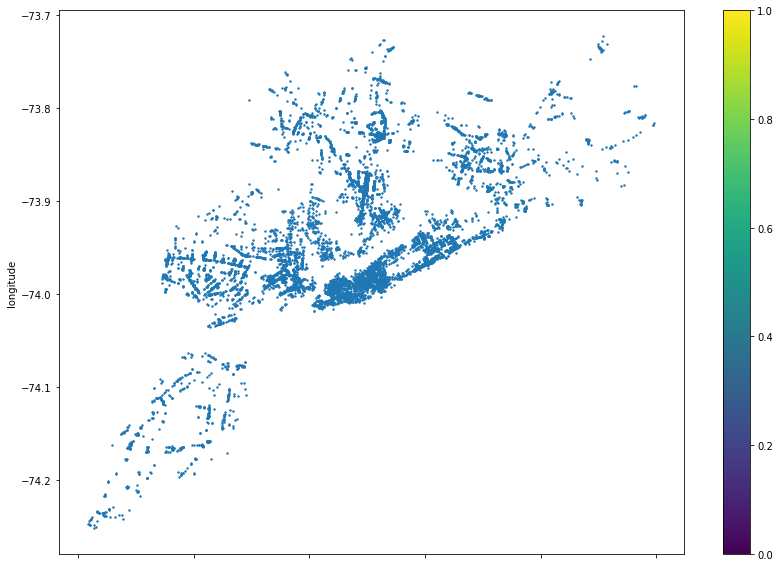

In [359]:
# Where are the highly prices houses?
location_data.plot(kind="scatter", x="latitude", y="longitude",
         cmap="inferno", figsize=(14, 10), s=2);

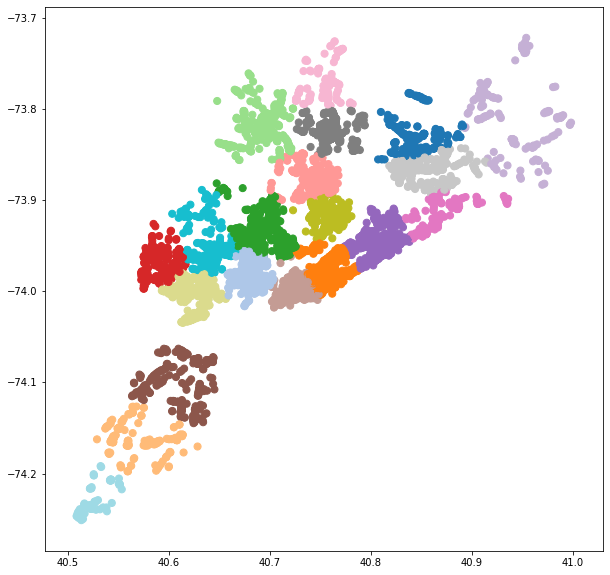

In [360]:
# What do these clusters look like visually?
plt.figure(figsize=(10, 10))
plt.scatter((location_data.latitude).astype(float), (location_data.longitude).astype(float), c=km.labels_, s=50 ,cmap="tab20");

In [361]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Extract the data we're interested in
df = df.dropna()
lat = df['latitude'].values
lon = df['longitude'].values
price = df['price'].values
rating = df['rating'].values

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
min(lat)

In [ ]:
min(lon)

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(resolution = 'i', projection = 'cyl',
            llcrnrlat=40.35868, llcrnrlon=-74.491350,
            urcrnrlat = 41.163819, urcrnrlon = -73.447253,epsg = 3395)
m.shadedrelief()
m.arcgisimage(service ="ESRI_Imagery_World_2D", xpixels = 2000)
# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=(price)**3, s=(rating)*4,
          cmap='Reds', alpha=0.5)

# 3. arcgisimage
plt.savefig("ESRI_Imagery_World_2D", bbox_inches = "tight", dpi = 500)

In [ ]:
# Train-test-split again
X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), y.copy(), random_state=42, test_size=0.5
)

In [ ]:
# How'd we do now?
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
# All this wrapped up!
def transfer_tune(X, y, k):
    location_data = df_yelp[["latitude", "longitude"]]
    km = KMeans(n_clusters=k)
    km.fit(location_data)
    X.loc[:, "cluster"] = km.predict(location_data)
    X_dummy = pd.get_dummies(columns=["cluster"], data=X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_dummy.copy(), y.copy(), random_state=42, test_size=0.5
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    print(f"{k} : {r2}")

In [ ]:
for k in range(2, 103, 5):
    transfer_tune(X, y, k)

In [ ]:
sns.scatterplot(data = df, x = 'affluency_rate', y = 'zip_code')

# ============
# Above is work in progress

## Saving/Loading Clean data

In [ ]:
# complete_df.to_csv("./data/clean_data.csv")

In [183]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import columnExpander
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [180]:
random_state = 6988

In [211]:
complete_df = pd.read_csv("./data/clean_data.csv", index_col = 0)

In [212]:
complete_df.head()

,id,price,rating,review_count,zip_code,city,state,latitude,longitude,affluency_rate,...,categories_thai,categories_artmuseums,categories_tobaccoshops,categories_internetcafe,transactions_,transactions_pickup,transactions_restaurant_reservation,transactions_delivery,is_affluent,location_cluster
0,GA5msU6NO9rQRctPfDJCBg,2.0,4,1082,11216,Brooklyn,NY,40.683370,-73.943780,0.022398,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,1
1,KkAtVVjnMfb1vGlcpzmhgw,2.0,4,303,11216,Brooklyn,NY,40.677866,-73.950000,0.022398,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,1
2,34LM8_lP8iwizHBu6YgaQQ,2.0,4,200,11216,Brooklyn,NY,40.680160,-73.941975,0.022398,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,1
3,ipmOYDh9snm3ZUv546MACQ,1.0,4,178,11216,Crown Heights,NY,40.672984,-73.950312,0.022398,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,1
4,Dv28TvKBh_8i6W02uAaMKw,2.0,4,140,11216,Bedford-Stuyvesant,NY,40.689756,-73.951087,0.022398,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,1


## Model Preparation

In [213]:
remove_columns = [
    'id',
    'zip_code',
    'city',
    'state',
    'latitude',
    'longitude',
    'affluency_rate',
    'transactions_'
]
target = 'is_affluent'

In [214]:
X = complete_df.drop(columns=remove_columns+[target])
y = complete_df[target]

In [215]:
X.shape

(9809, 289)

The baseline accuracy for the data is about 71.7% being not affluent.

In [216]:
y.value_counts(normalize = True)

0    0.704557
1    0.295443
Name: is_affluent, dtype: float64

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, stratify = y)

In [218]:
def spec(y_true,y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true,y_pred).ravel()
    specificity = (TN)/(TN+FP)
    return specificity
specificity_scorer = make_scorer(spec)

## Model Selection
- [Hadi] Exploring models
- [Eddie] Exploring models

Maybe split on which models you 2 want to try out

[Eddie] The models below uses all features created. The threshold is set at getting a decent score with a minimal amount of variance.

### Logistic Model

In [219]:
lr = LogisticRegression()

lr_params = {'C': np.logspace(.01, 5, 3),
          'penalty': ['l1', 'l2']}

gs_lr = GridSearchCV(lr, param_grid=lr_params, cv = 5, n_jobs=-1, verbose=2, scoring=specificity_scorer)

In [220]:
gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.7s finished
C:\Users\eyip1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.02329e+00, 3.19890e+02, 1.00000e+05]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(spec), verbose=2)

In [221]:
gs_lr.best_score_

0.9071984105121795

In [222]:
gs_lr.score(X_test, y_test)

0.9045138888888888

In [223]:
lr_y_pred = gs_lr.predict(X_test)

In [224]:
confusion_matrix(y_test, lr_y_pred)

array([[1563,  165],
       [ 427,  298]], dtype=int64)

### K-Nearest Neighbors Model

In [225]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

C:\Users\eyip1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\eyip1\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\eyip1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [226]:
knn = KNeighborsClassifier()

knn_params = {'n_neighbors': range(3, 13, 2),
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}
gs_knn = GridSearchCV(knn, param_grid=knn_params, cv = 5, n_jobs=-1, verbose=2, scoring=specificity_scorer)

In [227]:
gs_knn.fit(X_train_sc, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  3.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(3, 13, 2), 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [228]:
gs_knn.best_score_

0.7403480152256662

In [229]:
gs_knn.score(X_test_sc, y_test)

0.7236037505095801

In [230]:
knn_y_pred = gs_knn.predict(X_test_sc)
confusion_matrix(y_test, knn_y_pred)

array([[1524,  204],
       [ 474,  251]], dtype=int64)

In [203]:
knn_y_pred = gs_knn.predict(X_test_sc)
confusion_matrix(y_test, knn_y_pred)

array([[1340,  174],
       [ 382,  285]], dtype=int64)

In [81]:
knn_y_pred = gs_knn.predict(X_test_sc)
confusion_matrix(y_test, knn_y_pred)

array([[1445,  146],
       [ 387,  240]], dtype=int64)

### Decision Tree Model

In [231]:
dt = DecisionTreeClassifier(random_state = random_state)

dt_params = {'max_depth': [None, 3, 6],
             'min_samples_split': [2, 3, 4],
             'min_samples_leaf': [1, 2],
             'max_features': [150, None]}

gs_dt = GridSearchCV(dt, param_grid=dt_params, cv = 5, n_jobs=-1, verbose=2, scoring=specificity_scorer)

In [232]:
gs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   13.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=6988,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None, 3, 6, 7, 10], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2], 'max_features': [94, 130, 150, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(spec), verbose=2)

In [233]:
gs_dt.score(X_train, y_train)

0.9230175573991897

In [234]:
gs_dt.score(X_test, y_test)

0.921875

In [235]:
gs_dt.best_params_

{'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [236]:
dt_y_pred = gs_dt.predict(X_test)
confusion_matrix(y_test, dt_y_pred)

array([[1593,  135],
       [ 209,  516]], dtype=int64)

In [210]:
dt_y_pred = gs_dt.predict(X_test)
confusion_matrix(y_test, dt_y_pred)

array([[1328,  186],
       [ 340,  327]], dtype=int64)

In [88]:
dt_y_pred = gs_dt.predict(X_test)
confusion_matrix(y_test, dt_y_pred)

array([[1484,  107],
       [ 211,  416]], dtype=int64)

In [280]:
f1_score(y_test, dt_y_pred)

0.75

### Bagging Model

In [243]:
bc = BaggingClassifier(random_state = random_state)

bc_params = {'n_estimators': [30, 40, 50],
             'max_features': [1, .5, .1]}

gs_bc = GridSearchCV(bc, param_grid=bc_params, cv = 5, n_jobs=-1, verbose=2, scoring=specificity_scorer)

In [244]:
gs_bc.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    6.2s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    7.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=6988,
         verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [30, 40, 50], 'max_features': [1, 0.5, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [245]:
gs_bc.best_score_

0.8507340946166395

In [246]:
gs_bc.best_params_

{'max_features': 0.5, 'n_estimators': 30}

In [247]:
gs_bc.score(X_test, y_test)

0.8475336322869955

In [248]:
bc_y_pred = gs_bc.predict(X_test)
confusion_matrix(y_test, bc_y_pred)

array([[1569,  159],
       [ 215,  510]], dtype=int64)

In [95]:
bc_y_pred = gs_bc.predict(X_test)
confusion_matrix(y_test, bc_y_pred)

array([[1464,  127],
       [ 202,  425]], dtype=int64)

In [279]:
f1_score(y_test, bc_y_pred)

0.7317073170731707

### XGBoost Model

In [271]:
boost = xgb.XGBClassifier(random_state = random_state)

boost_params = {'booster': ['gbtree'],
             'max_depth': [3],
             'learning_rate': [.01, .1, .5]}

gs_boost = GridSearchCV(boost, param_grid=boost_params, cv = 5, n_jobs=-1, verbose=2)

In [272]:
gs_boost.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    9.1s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   18.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=6988, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'booster': ['gbtree'], 'max_depth': [3], 'learning_rate': [0.01, 0.1, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [273]:
gs_boost.best_params_

{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 3}

In [274]:
gs_boost.best_score_

0.8612017400761284

In [275]:
gs_boost.score(X_train, y_train)

0.8643284393692224

In [276]:
gs_boost.score(X_test, y_test)

0.8622095393395842

In [277]:
boost_y_pred = gs_boost.predict(X_test)
confusion_matrix(y_test, boost_y_pred)

array([[1597,  131],
       [ 207,  518]], dtype=int64)

In [278]:
f1_score(y_test, boost_y_pred)

0.7540029112081513

## Data Query

Defining a query where we input the zip code and it returns a dataframe with the associated affluency.

In [376]:
def query(postal_code):
    if incomplete_df[incomplete_df['zip_code'] == postal_code]['affluency_rate'].isnull().sum() == 0:
        return pd.DataFrame({'zip_code': postal_code, 'affluency_rate': incomplete_df[incomplete_df['zip_code'] == postal_code]['affluency_rate'].iloc[0]}, index = range(1))
    else:
        X = incomplete_df[incomplete_df['zip_code'] == postal_code].drop(columns = ['id',
                                                                            'zip_code',
                                                                            'city',
                                                                            'state',
                                                                            'latitude',
                                                                            'longitude',
                                                                            'affluency_rate',
                                                                            'transactions_'])
        y_pred = gs_dt.predict(X)
        return pd.DataFrame({'zip_code': postal_code, 'affluency_rate': y_pred.mean()}, index= range(1))

In [391]:
query(10455)

,zip_code,affluency_rate
0,10455,0.0


# incomplete_df[incomplete_df['affluency_rate'].isnull()].groupby('zip_code')['affluency_rate'].mean()

## Model Evaluation
- [Mahdi] killer graphs and visuals

## Conclusions and Recommendations
- [All]

## Source Documentation
- [NYC zip codes](https://www.nycbynatives.com/nyc_info/new_york_city_zip_codes.php)
- [Yelp API - Business Endpoints](https://www.yelp.com/fusion)
- [IRS dataset](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2016-zip-code-data-soi)